In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


from data_preparation import DataExtractor
from utils import visualize
from nn_training import set_random_seed

set_random_seed(57)

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 16


In [2]:
data_dir = '../Data/'

extractor = DataExtractor()

for base_element in ('Ti', 'Zr'):
    files_dir = os.path.join(data_dir, base_element)
    for file in os.listdir(files_dir):
        if file.endswith('.dat'):
            extractor.read_file(files_dir, file, 2, base_element)
        elif file.endswith('.unalloyed'):
            extractor.read_file(files_dir, file, 1, base_element)
files_dir = os.path.join(data_dir, 'Ternary')
for file in os.listdir(files_dir):
    if file.endswith('.dat'):
        extractor.read_file(files_dir, file, num_elements=3, base_element='Ti')

data = extractor.dataframe

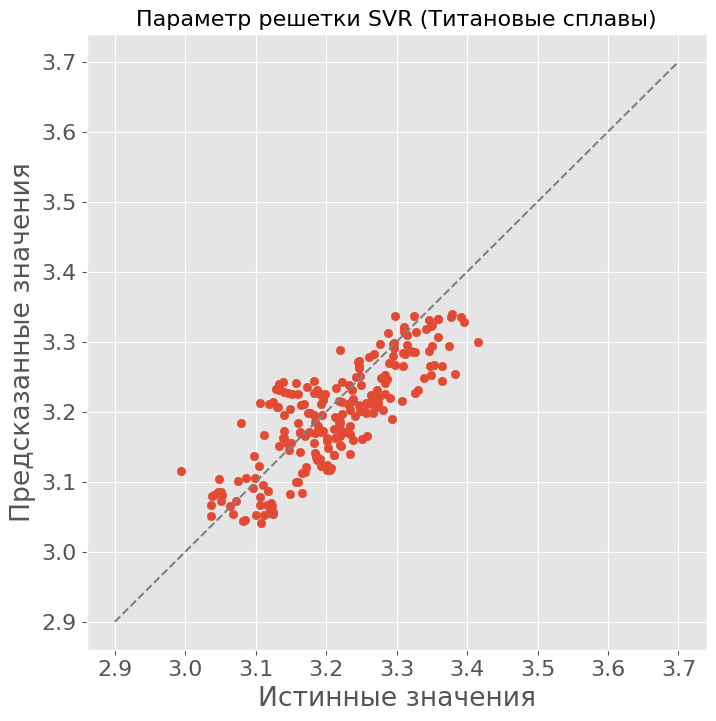

A RMSE Train: 0.050±0.000
A RMSE Test:  0.051±0.003
A R^2 Train: 0.657±0.008
A R^2 Test:  0.651±0.035


In [3]:
features = data[data.el1 == 'Ti'].apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data[data.el1 == 'Ti']['a'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    scaler = StandardScaler().fit(features_train)

    scaled_features_train = scaler.transform(features_train)
    scaled_features_test = scaler.transform(features_test)

    svr = SVR(kernel='rbf').fit(scaled_features_train, target_train)
    res_train = svr.predict(scaled_features_train)
    res_test = svr.predict(scaled_features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Параметр решетки SVR (Титановые сплавы)', 2.9, 3.7)
print(f"A RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"A RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"A R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"A R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")

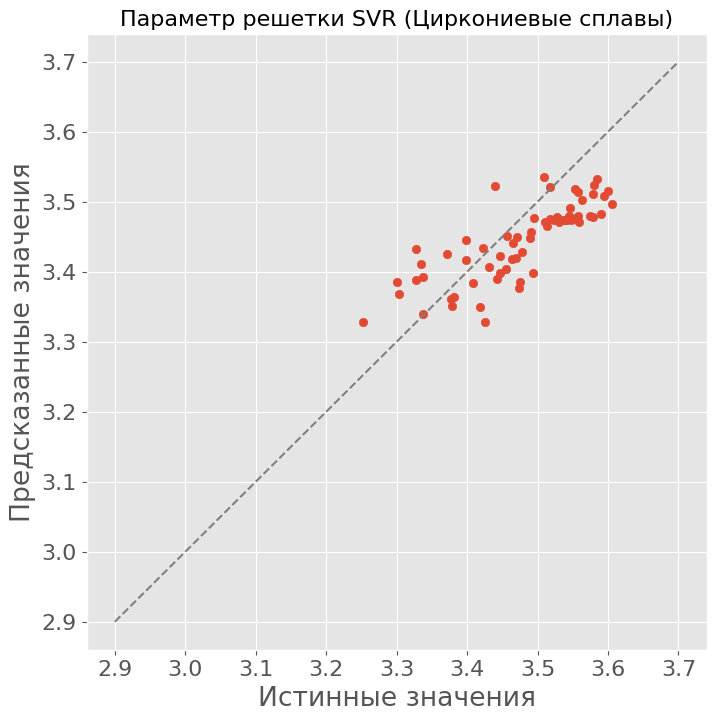

A RMSE Train: 0.060±0.001
A RMSE Test:  0.061±0.004
A R^2 Train: 0.594±0.005
A R^2 Test:  0.569±0.056


In [4]:
features = data[data.el1 == 'Zr'].apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data[data.el1 == 'Zr']['a'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    scaler = StandardScaler().fit(features_train)

    scaled_features_train = scaler.transform(features_train)
    scaled_features_test = scaler.transform(features_test)

    svr = SVR(kernel='rbf').fit(scaled_features_train, target_train)
    res_train = svr.predict(scaled_features_train)
    res_test = svr.predict(scaled_features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Параметр решетки SVR (Циркониевые сплавы)', 2.9, 3.7)
print(f"A RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"A RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"A R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"A R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")

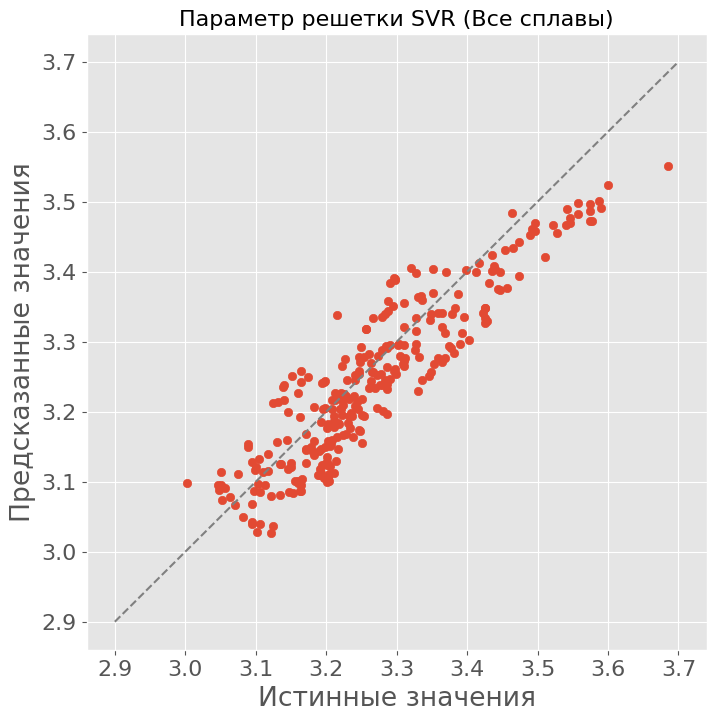

A RMSE Train: 0.057±0.001
A RMSE Test:  0.057±0.002
A R^2 Train: 0.832±0.005
A R^2 Test:  0.825±0.019


In [5]:
features = data.apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data['a'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    scaler = StandardScaler().fit(features_train)

    scaled_features_train = scaler.transform(features_train)
    scaled_features_test = scaler.transform(features_test)

    svr = SVR(kernel='rbf').fit(scaled_features_train, target_train)
    res_train = svr.predict(scaled_features_train)
    res_test = svr.predict(scaled_features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Параметр решетки SVR (Все сплавы)', 2.9, 3.7)
print(f"A RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"A RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"A R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"A R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")

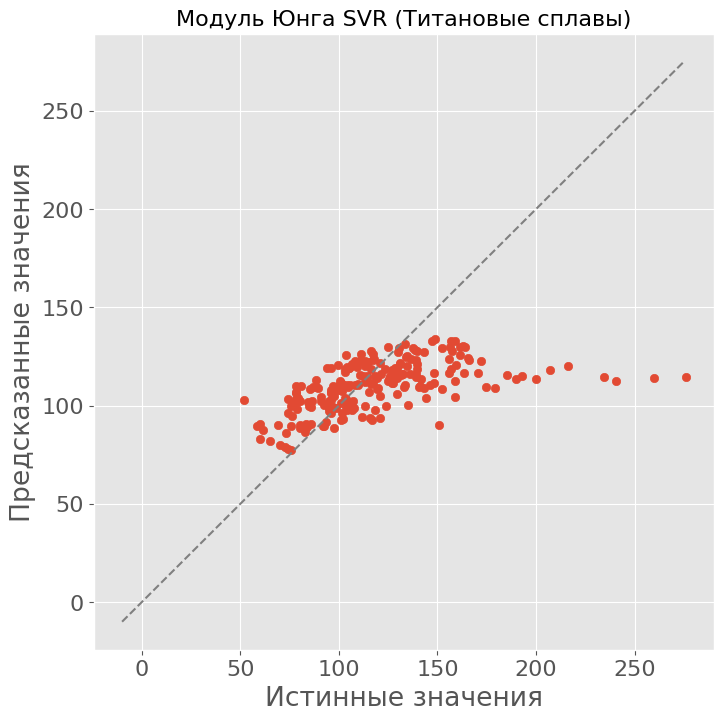

E RMSE Train: 26.136±0.753
E RMSE Test:  26.280±3.479
E R^2 Train: 0.300±0.014
E R^2 Test:  0.287±0.066


In [6]:
features = data[data.el1 == 'Ti'].apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data[data.el1 == 'Ti']['e'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    scaler = StandardScaler().fit(features_train)

    scaled_features_train = scaler.transform(features_train)
    scaled_features_test = scaler.transform(features_test)

    svr = SVR(kernel='rbf').fit(scaled_features_train, target_train)
    res_train = svr.predict(scaled_features_train)
    res_test = svr.predict(scaled_features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Модуль Юнга SVR (Титановые сплавы)', -10, 275)
print(f"E RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"E RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"E R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"E R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")

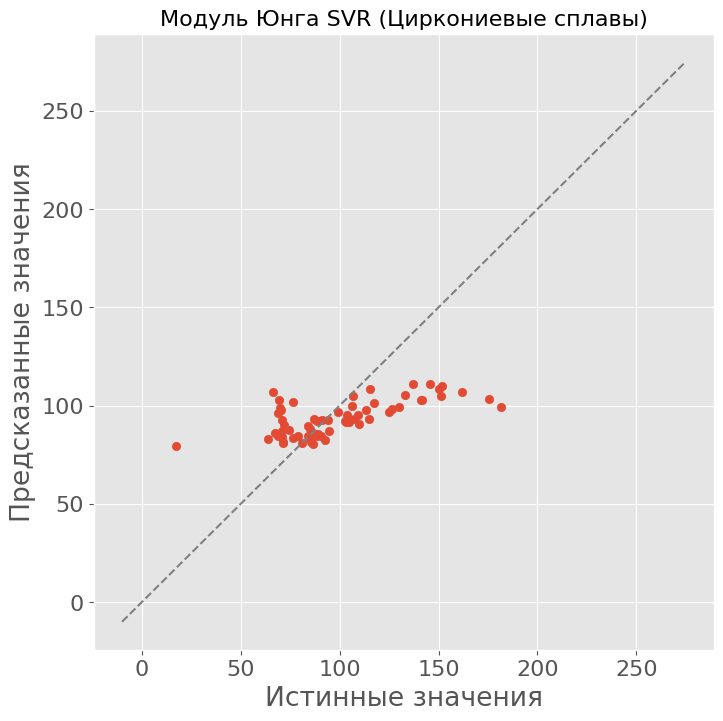

E RMSE Train: 34.610±1.610
E RMSE Test:  34.477±6.861
E R^2 Train: 0.229±0.026
E R^2 Test:  0.219±0.066


In [7]:
features = data[data.el1 == 'Zr'].apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data[data.el1 == 'Zr']['e'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    scaler = StandardScaler().fit(features_train)

    scaled_features_train = scaler.transform(features_train)
    scaled_features_test = scaler.transform(features_test)

    svr = SVR(kernel='rbf').fit(scaled_features_train, target_train)
    res_train = svr.predict(scaled_features_train)
    res_test = svr.predict(scaled_features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Модуль Юнга SVR (Циркониевые сплавы)', -10, 275)
print(f"E RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"E RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"E R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"E R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")

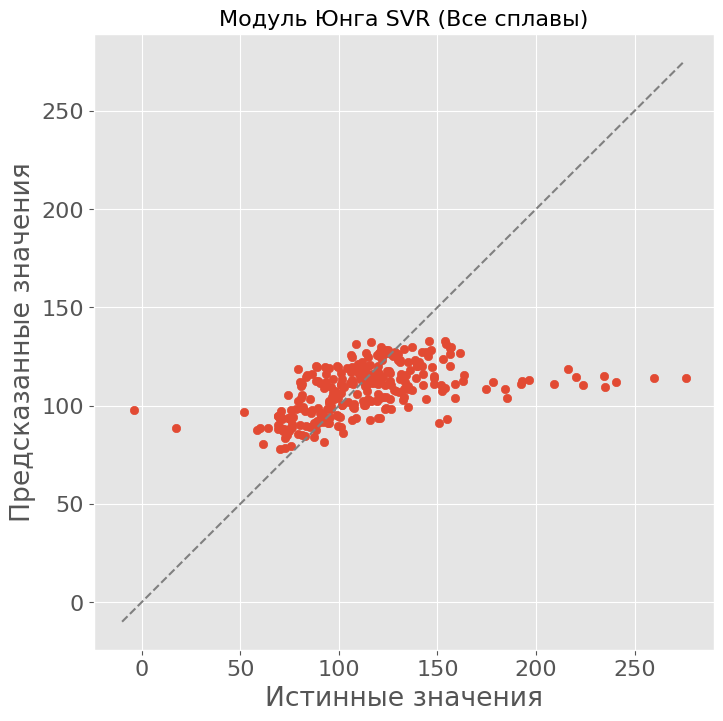

E RMSE Train: 28.841±0.842
E RMSE Test:  29.021±4.157
E R^2 Train: 0.280±0.017
E R^2 Test:  0.265±0.077


In [8]:
features = data.apply(extractor.extract_properties, axis=1, result_type='expand').to_numpy()
target = data['e'].to_numpy()

cv_mse_train = []
cv_mse_test = []
cv_r2_train = []
cv_r2_test = []

for train_index, test_index in KFold(n_splits=5, shuffle=True, random_state=57).split(features):
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

    scaler = StandardScaler().fit(features_train)

    scaled_features_train = scaler.transform(features_train)
    scaled_features_test = scaler.transform(features_test)

    svr = SVR(kernel='rbf').fit(scaled_features_train, target_train)
    res_train = svr.predict(scaled_features_train)
    res_test = svr.predict(scaled_features_test)
    cv_mse_train.append(mean_squared_error(target_train, res_train, squared=False))
    cv_mse_test.append(mean_squared_error(target_test, res_test, squared=False))
    cv_r2_train.append(r2_score(target_train, res_train))
    cv_r2_test.append(r2_score(target_test, res_test))

visualize(target_test, res_test, 'Модуль Юнга SVR (Все сплавы)', -10, 275)
print(f"E RMSE Train: {np.mean(cv_mse_train):.3f}±{np.std(cv_mse_train):.3f}\n"
      f"E RMSE Test:  {np.mean(cv_mse_test):.3f}±{np.std(cv_mse_test):.3f}")
print(f"E R^2 Train: {np.mean(cv_r2_train):.3f}±{np.std(cv_r2_train):.3f}\n"
      f"E R^2 Test:  {np.mean(cv_r2_test):.3f}±{np.std(cv_r2_test):.3f}")